In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import datetime, time

In [18]:
seaice = pd.read_csv('seaice.csv')

In [46]:
seaice.head()

,Year,Month,Day,Extent,Missing,hemisphere
0,1978,11,1,10.670,0.0,north
1,1978,12,1,12.725,0.0,north
2,1979,2,1,15.857,0.0,north
3,1979,3,1,16.635,0.0,north
4,1979,6,1,13.076,0.0,north


In [20]:
temps = pd.read_csv('GlobalTemperatures.csv')

In [21]:
temps.tail()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
3187,2015-08-01,14.755,0.072,20.699,0.110,9.005,0.170,17.589,0.057
3188,2015-09-01,12.999,0.079,18.845,0.088,7.199,0.229,17.049,0.058
3189,2015-10-01,10.801,0.102,16.450,0.059,5.232,0.115,16.290,0.062
3190,2015-11-01,7.433,0.119,12.892,0.093,2.157,0.106,15.252,0.063
3191,2015-12-01,5.518,0.100,10.725,0.154,0.287,0.099,14.774,0.062


### Let's extract year, month, and day individually to make it possible to join the two datasets on these parameters later. This will also help us to eventually explore patterns in more detail.

In [22]:
temps['Year'] = temps['dt'].apply(lambda x: int(x[0:4]))

In [23]:
temps['Month'] = temps['dt'].apply(lambda x: int(x[5:7]))

In [24]:
temps['Day'] = temps['dt'].apply(lambda x: int(x[8:10]))

In [25]:
temps = temps.drop(temps[temps['Year'] < 1979].index)

### The 'dt' column is actually in string format so let's convert it to something more usable with pd.to_datetime

In [27]:
temps['dt'] = pd.to_datetime(temps.dt, format="%Y/%m/%d")

In [31]:
temps = temps.reset_index(drop=True)

In [32]:
temps.tail()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,Year,Month,Day
439,2015-08-01,14.755,0.072,20.699,0.110,9.005,0.170,17.589,0.057,2015,8,1
440,2015-09-01,12.999,0.079,18.845,0.088,7.199,0.229,17.049,0.058,2015,9,1
441,2015-10-01,10.801,0.102,16.450,0.059,5.232,0.115,16.290,0.062,2015,10,1
442,2015-11-01,7.433,0.119,12.892,0.093,2.157,0.106,15.252,0.063,2015,11,1
443,2015-12-01,5.518,0.100,10.725,0.154,0.287,0.099,14.774,0.062,2015,12,1


In [33]:
temps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444 entries, 0 to 443
Data columns (total 12 columns):
dt                                           444 non-null datetime64[ns]
LandAverageTemperature                       444 non-null float64
LandAverageTemperatureUncertainty            444 non-null float64
LandMaxTemperature                           444 non-null float64
LandMaxTemperatureUncertainty                444 non-null float64
LandMinTemperature                           444 non-null float64
LandMinTemperatureUncertainty                444 non-null float64
LandAndOceanAverageTemperature               444 non-null float64
LandAndOceanAverageTemperatureUncertainty    444 non-null float64
Year                                         444 non-null int64
Month                                        444 non-null int64
Day                                          444 non-null int64
dtypes: datetime64[ns](1), float64(8), int64(3)
memory usage: 41.7 KB


### Our global temperature data only has measurements for the first day of each month and doesn't extend past the end of 2015, so we need to drop the relevant entries for consistency when we combine the datasets

In [34]:
seaice = seaice.drop(seaice[seaice['Day'] != 1].index)

In [35]:
seaice = seaice.drop(seaice[seaice['Year'] > 2015].index)

In [37]:
seaice.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 786 entries, 3 to 24353
Data columns (total 7 columns):
Year           786 non-null int64
Month          786 non-null int64
Day            786 non-null int64
Extent         786 non-null float64
Missing        786 non-null float64
Source Data    786 non-null object
hemisphere     786 non-null object
dtypes: float64(2), int64(3), object(2)
memory usage: 49.1+ KB


In [38]:
seaice = seaice.reset_index(drop=True)

In [39]:
seaice.head(10)

,Year,Month,Day,Extent,Missing,Source Data,hemisphere
0,1978,11,1,10.670,0.0,['ftp://sidads.colorado.edu/pub/DATASETS/nsidc...,north
1,1978,12,1,12.725,0.0,['ftp://sidads.colorado.edu/pub/DATASETS/nsidc...,north
2,1979,2,1,15.857,0.0,['ftp://sidads.colorado.edu/pub/DATASETS/nsidc...,north
3,1979,3,1,16.635,0.0,['ftp://sidads.colorado.edu/pub/DATASETS/nsidc...,north
4,1979,6,1,13.076,0.0,['ftp://sidads.colorado.edu/pub/DATASETS/nsidc...,north
5,1979,7,1,11.562,0.0,['ftp://sidads.colorado.edu/pub/DATASETS/nsidc...,north
6,1979,9,1,7.228,0.0,['ftp://sidads.colorado.edu/pub/DATASETS/nsidc...,north
7,1979,10,1,7.404,0.0,['ftp://sidads.colorado.edu/pub/DATASETS/nsidc...,north
8,1980,1,1,14.200,0.0,['ftp://sidads.colorado.edu/pub/DATASETS/nsidc...,north
9,1980,3,1,16.157,0.0,['ftp://sidads.colorado.edu/pub/DATASETS/nsidc...,north


In [41]:
seaice = seaice.drop('Source Data', 1)

### Now that we've done a decent amount of cleaning and massaging of the data, we can combine the two datasets with an inner join on matching year, month, and day.

In [42]:
df = pd.merge(temps, seaice, on=['Year','Month','Day'], how='inner')

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 782 entries, 0 to 781
Data columns (total 15 columns):
dt                                           782 non-null datetime64[ns]
LandAverageTemperature                       782 non-null float64
LandAverageTemperatureUncertainty            782 non-null float64
LandMaxTemperature                           782 non-null float64
LandMaxTemperatureUncertainty                782 non-null float64
LandMinTemperature                           782 non-null float64
LandMinTemperatureUncertainty                782 non-null float64
LandAndOceanAverageTemperature               782 non-null float64
LandAndOceanAverageTemperatureUncertainty    782 non-null float64
Year                                         782 non-null int64
Month                                        782 non-null int64
Day                                          782 non-null int64
Extent                                       782 non-null float64
Missing                             

In [120]:
df.head(48)

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,Year,Month,Day,Extent,Missing,hemisphere
0,1979-02-01,2.841,0.089,8.525,0.076,-2.759,0.147,13.768,0.047,1979,2,1,15.857,0.0,north
1,1979-02-01,2.841,0.089,8.525,0.076,-2.759,0.147,13.768,0.047,1979,2,1,3.704,0.0,south
2,1979-03-01,5.474,0.102,11.331,0.187,-0.129,0.272,14.565,0.051,1979,3,1,16.635,0.0,north
3,1979-03-01,5.474,0.102,11.331,0.187,-0.129,0.272,14.565,0.051,1979,3,1,3.248,0.0,south
4,1979-06-01,13.487,0.067,19.366,0.213,7.818,0.215,16.772,0.043,1979,6,1,13.076,0.0,north
5,1979-06-01,13.487,0.067,19.366,0.213,7.818,0.215,16.772,0.043,1979,6,1,12.654,0.0,south
6,1979-07-01,14.114,0.054,19.945,0.109,8.491,0.117,16.992,0.042,1979,7,1,11.562,0.0,north
7,1979-07-01,14.114,0.054,19.945,0.109,8.491,0.117,16.992,0.042,1979,7,1,15.685,0.0,south
8,1979-09-01,12.247,0.091,18.059,0.180,6.714,0.240,16.450,0.048,1979,9,1,7.228,0.0,north
9,1979-09-01,12.247,0.091,18.059,0.180,6.714,0.240,16.450,0.048,1979,9,1,18.187,0.0,south


### Let's separate the data for the northern and southern hemispheres and briefly explore each.

In [49]:
north = df[df['hemisphere'] == 'north']

In [110]:
south = df[df['hemisphere'] == 'south']

In [108]:
sns.mpl.rc("figure", figsize=(18,6))

### In this timeseries, we can see a slow but steady increase in average land and ocean temperatures since 1978.

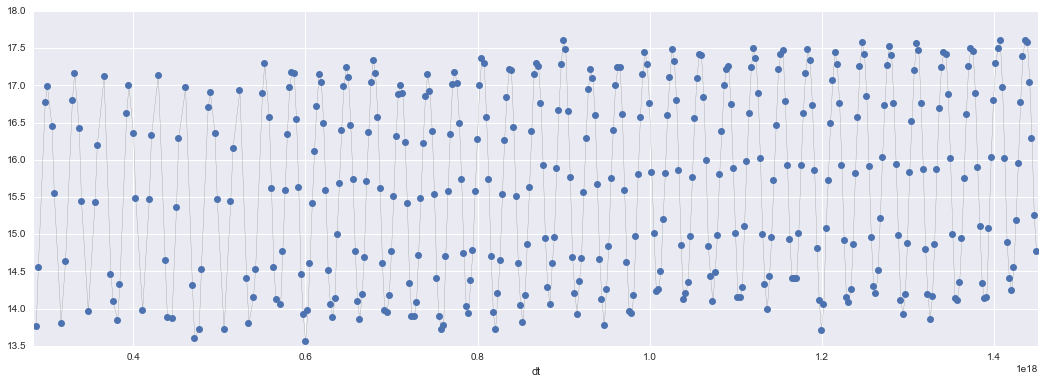

In [109]:
sns.tsplot(data = north['LandAndOceanAverageTemperature'], time = north['dt'], interpolate=False)

### This scatter plot illustrates the distinct decrease in the extent of sea ice in the Northern Hemisphere as average global temperatures increase, as you would expect.

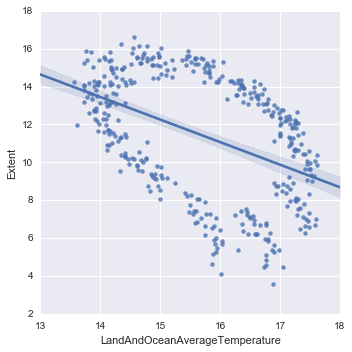

In [75]:
sns.lmplot('LandAndOceanAverageTemperature', 'Extent', data=north, fit_reg=True)

### Surprisingly, if you weren't previously aware, sea ice in the Southern Hemisphere is doing the opposite and is actually increasing as average temperatures have increased since 1978.

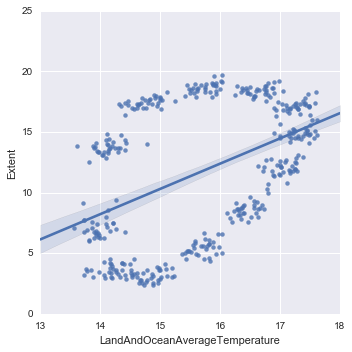

In [111]:
sns.lmplot('LandAndOceanAverageTemperature', 'Extent', data=south, fit_reg=True)

### Now let's drop a few columns to make the overall dataset more manageable and have a look at both hemispheres.

In [112]:
world = df.drop(['Day', 'LandAverageTemperatureUncertainty', 'LandMaxTemperatureUncertainty', 'LandMinTemperature', 'LandMinTemperatureUncertainty', 'Missing'],1)

### The following pairplots start to reveal some really interesting patters in the data when coloring the results by hemisphere and comparing them.

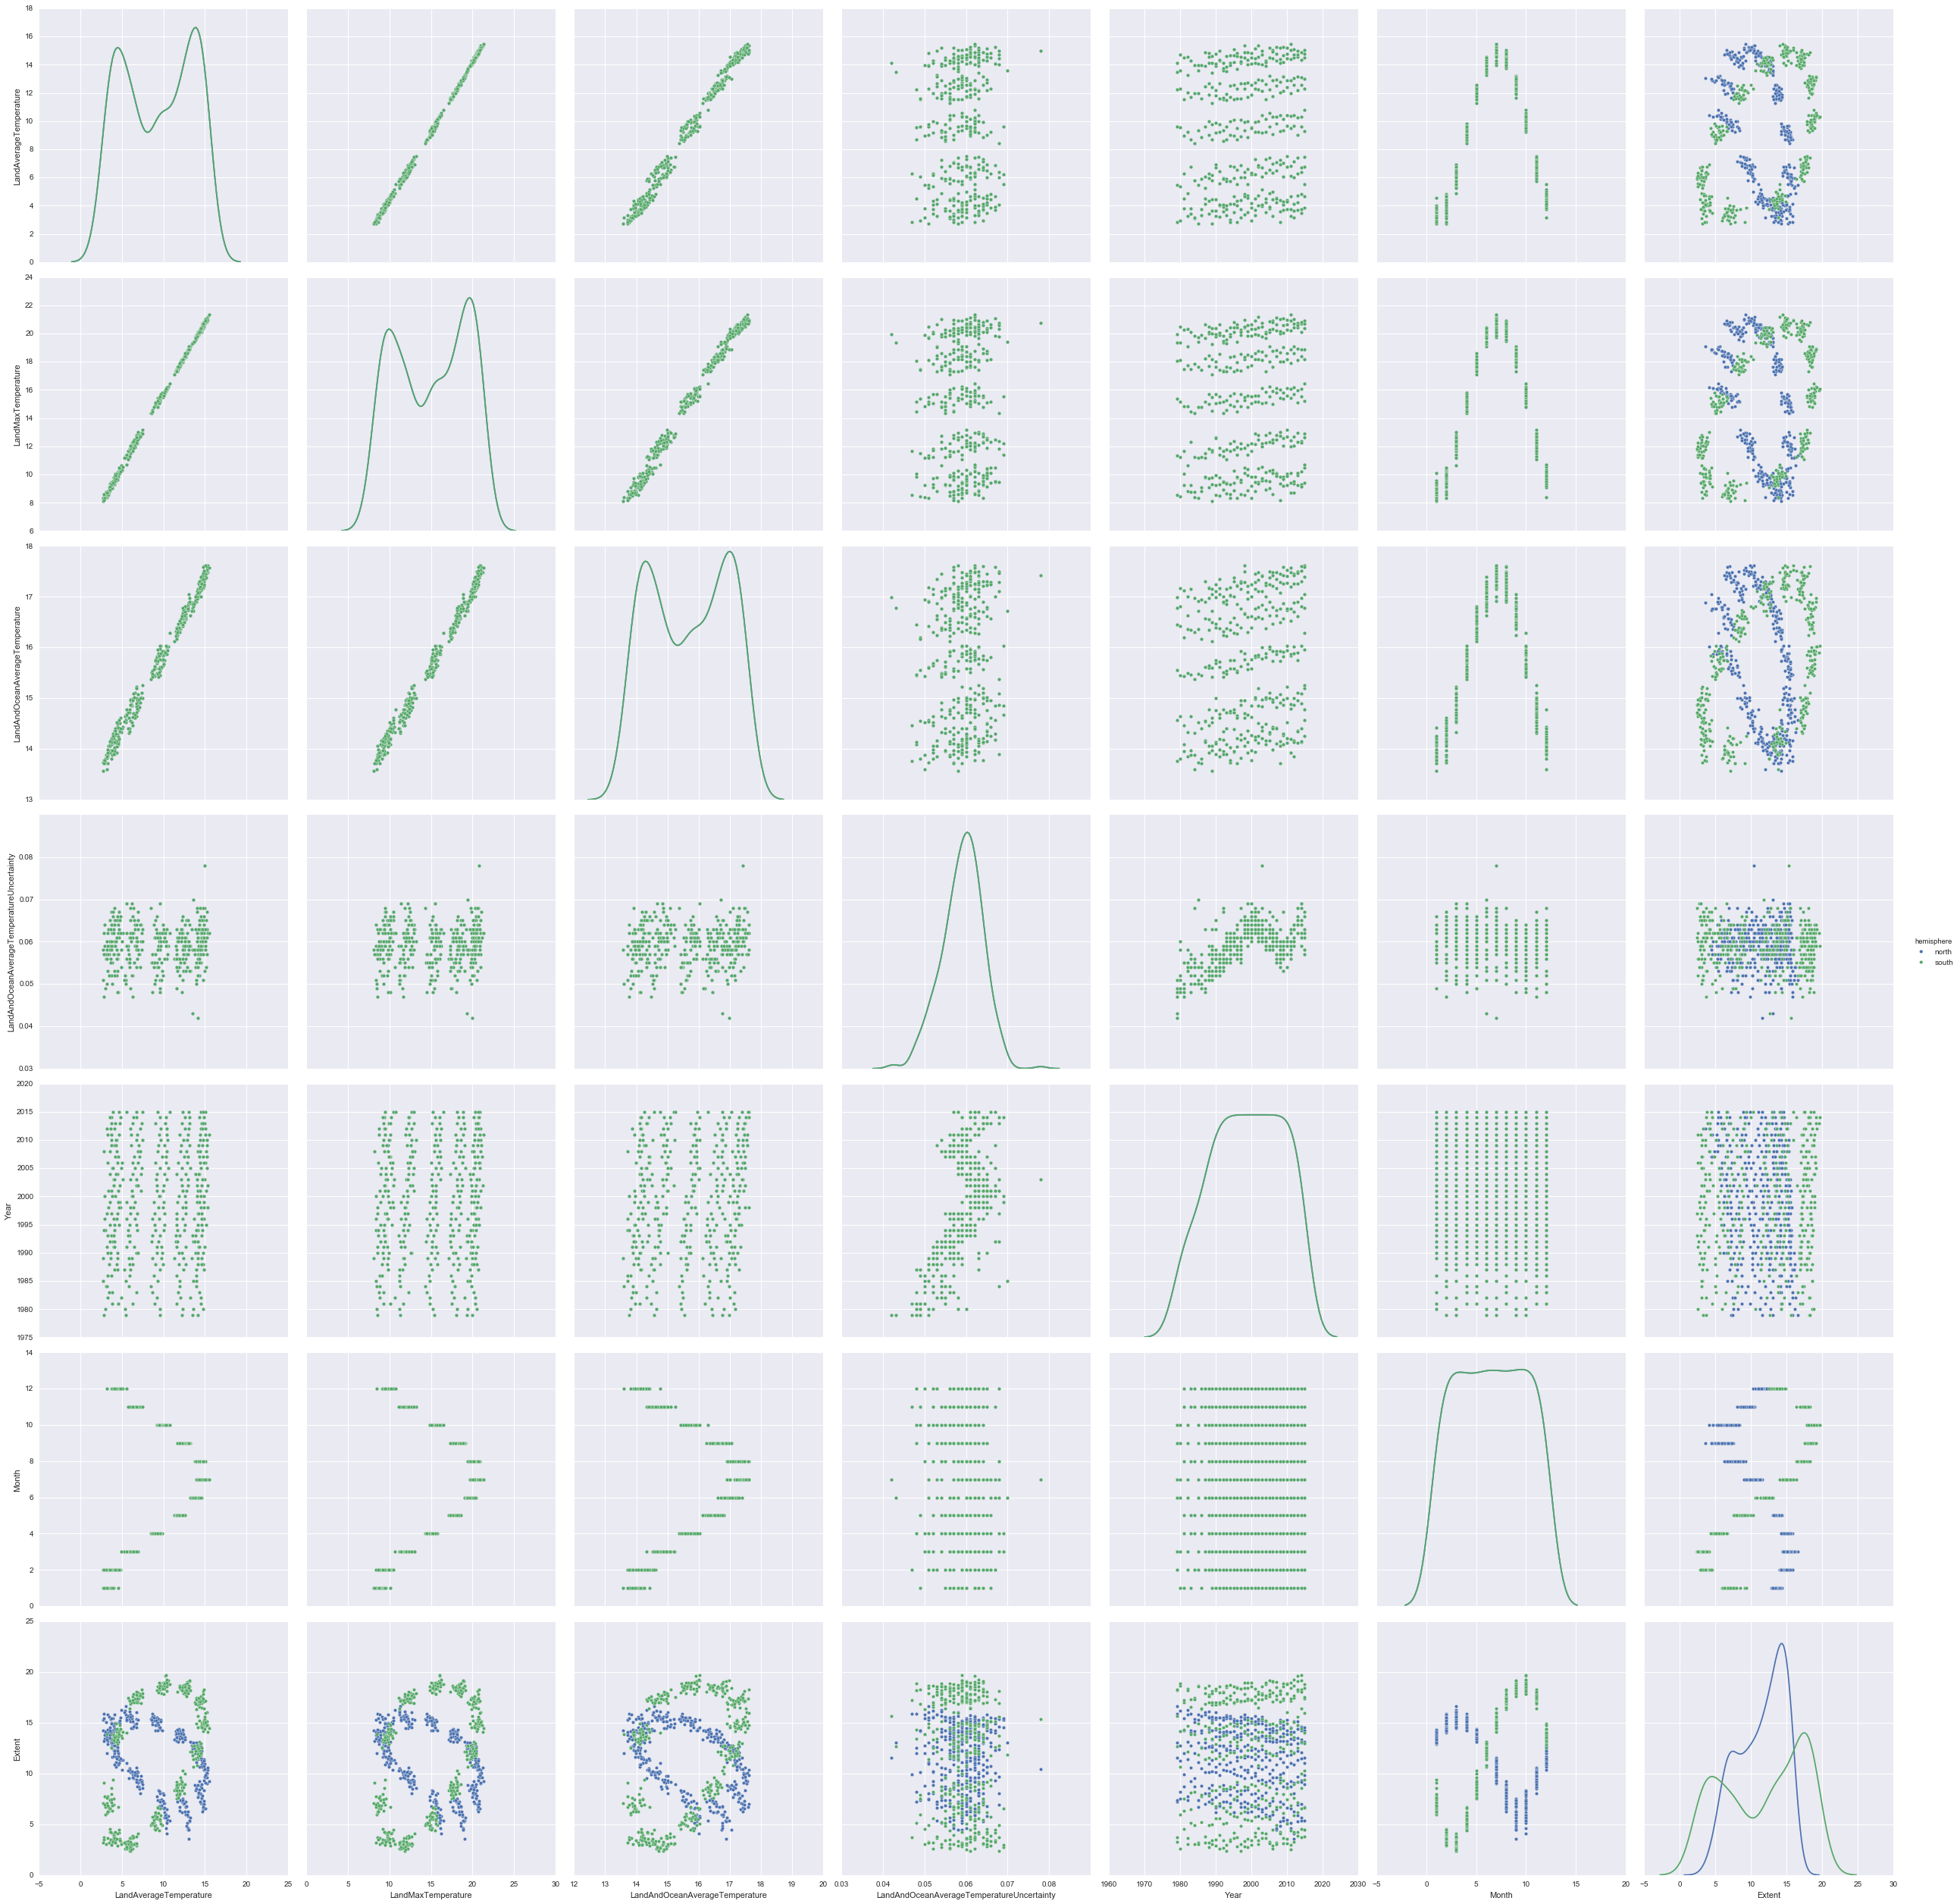

In [113]:
sns.pairplot(world, hue='hemisphere', diag_kind='kde', size=5)

### Let's take a closer look at a couple of the more visually interesting plots.

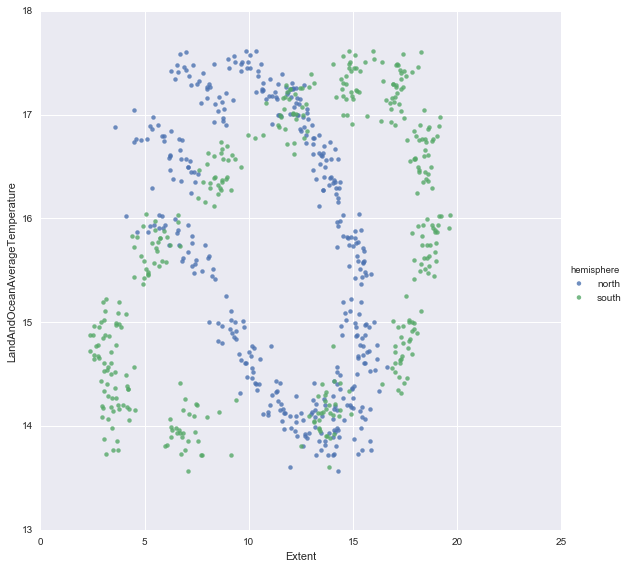

In [118]:
sns.lmplot('Extent', 'LandAndOceanAverageTemperature', data=world, fit_reg=False, hue='hemisphere', size=8)

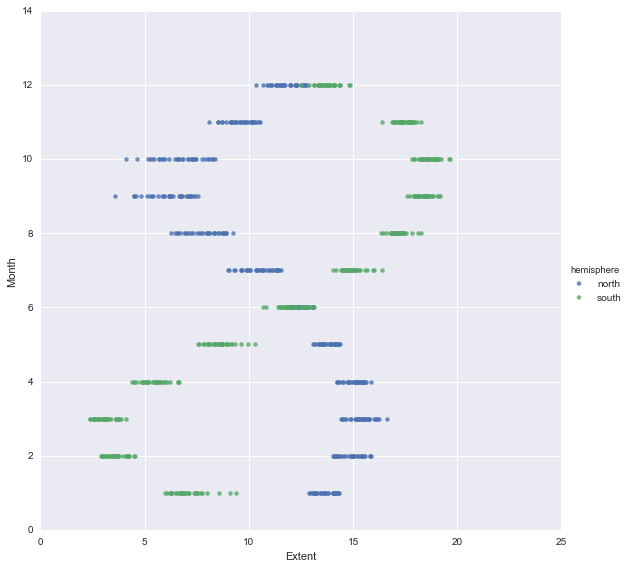

In [117]:
sns.lmplot('Extent', 'Month', data=temp, fit_reg=False, hue='hemisphere', size=8)

### Now, let's take our overall 'world' dataset and see if we can come up with a regression model that can predict the extent of sea ice. If we get a good, accurate model, we should be able to use that to estimate future sea ice if we feed it data that incorporates estimated rises in average temperatures due to global warming.

### First, we need to transform our north/south hemisphere column from a string to a binary value. We'll use 0 to represent north, and 1 for south

In [121]:
hemisphere = []
for val in df['hemisphere']:
    if val == 'north':
        hemisphere.append(0)
    else:
        hemisphere.append(1)

In [123]:
hemisphere = pd.Series(hemisphere)

In [124]:
df = world.drop('hemisphere',1)

In [125]:
df['hemisphere'] = hemisphere.values

In [145]:
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import Ridge
# from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import mean_absolute_error

In [139]:
df_feat = df.drop('Extent', 1)
df_target = df['Extent']

### Train/Test split (70/30)

In [140]:
X_train, X_test, y_train, y_test = train_test_split(df_feat, df_target, test_size=0.30)

### Since we're trying to predict a quantity and have less than 100k samples, let's try a ridge regression model to start with.

In [141]:
model = Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [137]:
df = df.drop('dt', 1)

In [142]:
model.fit(X_train,y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [143]:
predictions = model.predict(X_test)

In [147]:
mean_absolute_error(y_test, predictions)

3.8504003530587565